# Multi-class classification
Classify Reuters newswires into 1 of 46 topics

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
# vectorise train/test data
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
# create the model
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.5353 - accuracy: 0.5322 - val_loss: 1.6546 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3649 - accuracy: 0.7097 - val_loss: 1.2638 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0286 - accuracy: 0.7770 - val_loss: 1.1107 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8151 - accuracy: 0.8269 - val_loss: 1.0519 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6581 - accuracy: 0.8594 - val_loss: 0.9511 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5261 - accuracy: 0.8901 - val_loss: 0.9168 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4229 - accuracy: 0.9104 - val_loss: 0.8813 - val_accuracy: 0.8190
Epoch 8/20
16

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

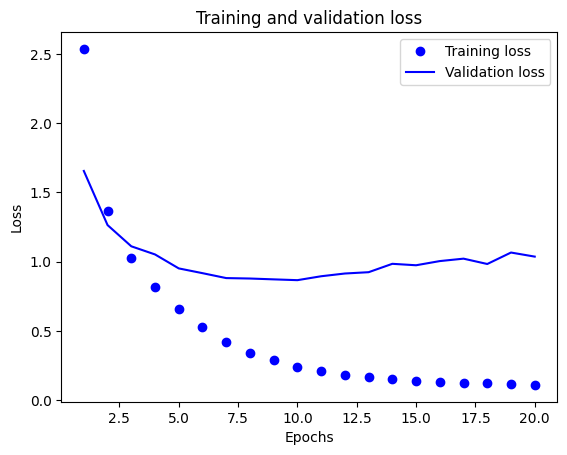

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

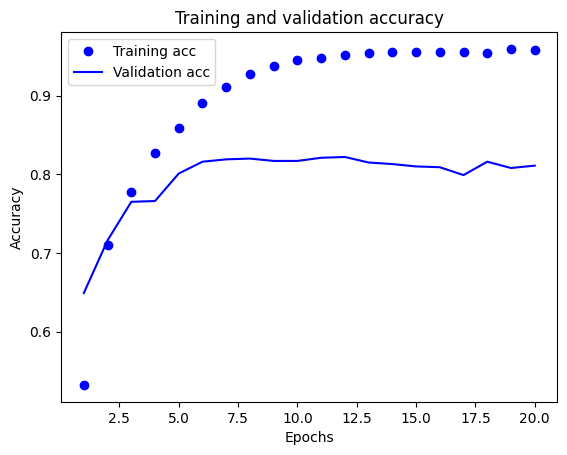

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
# recreate and retrain the model with fewer epochs to prevent overfitting
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 18ms/step - loss: 2.5216 - acc: 0.5309 - val_loss: 1.6573 - val_acc: 0.6380
Epoch 2/8
16/16 [==============================] - 0s 15ms/step - loss: 1.3672 - acc: 0.7082 - val_loss: 1.2711 - val_acc: 0.7090
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.0150 - acc: 0.7791 - val_loss: 1.1200 - val_acc: 0.7520
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.7963 - acc: 0.8312 - val_loss: 1.0056 - val_acc: 0.7900
Epoch 5/8
16/16 [==============================] - 0s 14ms/step - loss: 0.6321 - acc: 0.8667 - val_loss: 0.9547 - val_acc: 0.7990
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.5050 - acc: 0.8944 - val_loss: 0.8973 - val_acc: 0.8080
Epoch 7/8
16/16 [==============================] - 0s 14ms/step - loss: 0.4044 - acc: 0.9144 - val_loss: 0.9019 - val_acc: 0.8040
Epoch 8/8
71/71 [==============================] - 0s 1ms/step - loss: 0.9857 - acc: 0.784

In [14]:
results

[0.9857008457183838, 0.7845057845115662]

In [15]:
model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


array([[4.16716764e-04, 1.28581584e-03, 7.26438826e-04, ...,
        3.43581429e-04, 7.50929348e-06, 1.39214055e-04],
       [7.01327110e-03, 2.32050866e-01, 4.75872483e-04, ...,
        4.13807487e-04, 1.58515795e-05, 1.37120805e-05],
       [1.81050319e-03, 8.76369715e-01, 1.27055531e-03, ...,
        3.30313516e-04, 4.21691919e-03, 4.35825750e-05],
       ...,
       [1.79795563e-04, 5.61541878e-04, 8.04175623e-04, ...,
        3.60463564e-05, 1.85070403e-05, 1.62642100e-04],
       [4.20850283e-03, 1.04719251e-01, 4.36484860e-03, ...,
        3.02572805e-03, 5.27504424e-04, 8.20471090e-04],
       [6.41936611e-04, 8.60109925e-01, 6.41395943e-03, ...,
        4.92499734e-04, 5.00335183e-04, 4.72720130e-05]], dtype=float32)